**Q1**. Give a brief definitions for the following:

i. Max-Flow

ii. Cut set

iii. Min-cut

iv. Network Flow

v. Bellman-Ford

**Solution:**

**i. Max-Flow:**

Max-Flow is a concept in network flow theory, which refers to finding the maximum amount of flow that can be sent from a source node to a sink node in a flow network. It is often solved using algorithms like the Ford-Fulkerson algorithm.

**ii. Cut Set:**

A cut set in a network refers to a set of edges that, if removed from the network, would disconnect the source node from the sink node. It represents a partition of the network into two disjoint sets, one containing the source and the other containing the sink.

**iii. Min-Cut:**

Min-Cut is the smallest possible capacity of a cut set in a flow network. It represents the minimum amount of flow that needs to be removed (by cutting edges) to disconnect the source from the sink. Finding the minimum cut is a crucial step in solving maximum flow problems.

**iv. Network Flow:**

Network flow is a mathematical concept used to model the transportation or distribution of resources (e.g., goods, information, or data) through a network of interconnected nodes and edges. The goal is to optimize the flow of resources while respecting capacity constraints.

**v. Bellman-Ford:**

The Bellman-Ford algorithm is a dynamic programming algorithm used for finding the shortest path from a source node to all other nodes in a weighted, directed graph. It can handle graphs with negative edge weights and is a fundamental algorithm in network and graph theory.

**Q2**.Use the Bellman-Ford algorithm to find the shortest path from node A to G in the weighted directed graph below. Show your work.
What is the time complexity of Bellman-Ford? And for what condition algorithm fail?

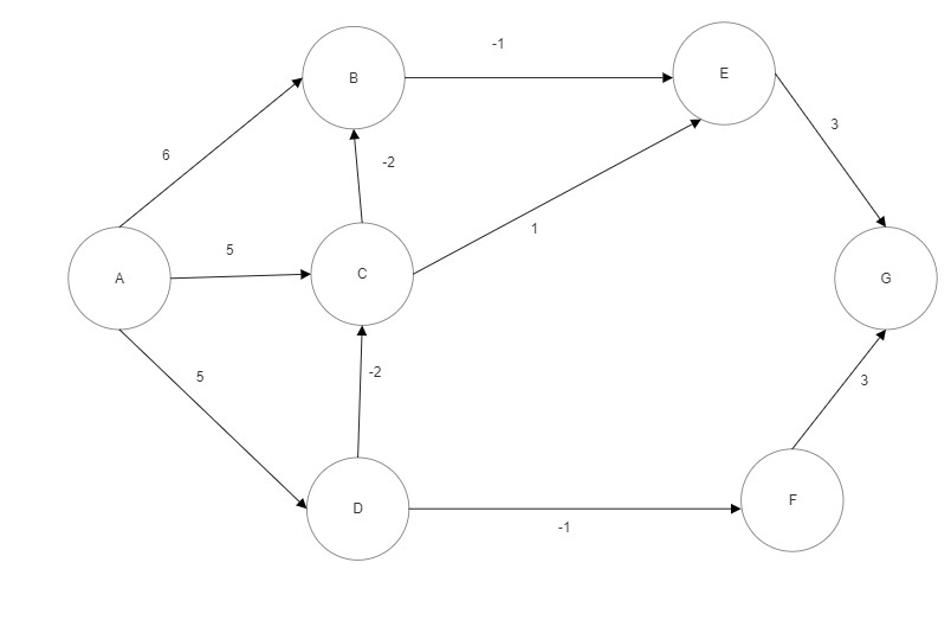

**Solution:**

Bellman Ford algorithm works by overestimating the length of the path from the starting vertex to all other vertices. Then it iteratively relaxes those estimates by finding new paths that are shorter than the previously overestimated paths.
Pseudocode:

1.	Initialize the distance from the source node (A) to all other nodes as infinity except for the distance from A to itself which is 0.

2.	For each edge (u, v) in the graph, update the distance to node v as the minimum of its current value and the distance to node u plus the weight of the edge (u, v).

3.	Repeat step 2 for |V| - 1 times, where |V| is the number of nodes in the graph.

4.	Check for negative weight cycles by iterating through all edges one more time and if any distance is updated, then there exists a negative weight cycle in the graph.

As for the time complexity of the Bellman-Ford algorithm, it is O(|V||E|), where |V| is the number of nodes and |E| is the number of edges in the graph. This is because the algorithm processes each edge |V| - 1 times in step 3.

The Bellman-Ford algorithm fails to give the correct shortest path if the graph contains a negative weight cycle. This is because the algorithm will keep reducing the distance to a node as long as there exists a path with a negative weight cycle. The algorithm will keep looping forever and not converge to the correct shortest path. In step 4 of the algorithm, we can detect the presence of a negative weight cycle, and if there is one, the algorithm will not return a valid shortest path.




In [1]:
from collections import defaultdict


def bellman_ford(graph, source, destination):

    # Initialize distances to all nodes as infinity except for the source node

    distances = {node: float('inf') for node in graph}

    distances[source] = 0



    # Initialize previous nodes to an empty dictionary

    previous_nodes = {}



    # Repeat for |V| - 1 times

    for _ in range(len(graph) - 1):

        # Iterate through all edges in the graph

        for node in graph:

            for neighbor in graph[node]:

                # Update the distance to the neighbor node if a shorter path is found

                if distances[node] + graph[node][neighbor] < distances[neighbor]:

                    distances[neighbor] = distances[node] + graph[node][neighbor]

                    previous_nodes[neighbor] = node



    # Check for negative weight cycles

    for node in graph:

        for neighbor in graph[node]:

            if distances[node] + graph[node][neighbor] < distances[neighbor]:

                raise ValueError("Negative weight cycle detected")



    # Return the shortest distance between the source and destination nodes and vertex distances from the source

    shortest_distance = distances[destination]

    vertex_distances = defaultdict(lambda: float('inf'))

    for node in graph:

        vertex_distances[node] = distances[node]



    return shortest_distance, dict(vertex_distances)





graph = {

    'A': {'B': 6, 'C': 5, 'D': 5},

    'B': {'E': -1},

    'C': {'E': 5, 'B': -2},

    'D': {'C': -2, 'F': -1},

    'E': {'G': 3},

    'F': {'G': 3},

    'G': {}

}



source = 'A'

destination = 'G'



shortest_distance, vertex_distances = bellman_ford(graph, source, destination)



print(f"The shortest distance from node {source} to node {destination} is: {shortest_distance}")

print("The vertex distances from the source node are:")

for node, distance in vertex_distances.items():

    print(f"Distance from {source} to {node}: {distance}")




The shortest distance from node A to node G is: 3
The vertex distances from the source node are:
Distance from A to A: 0
Distance from A to B: 1
Distance from A to C: 3
Distance from A to D: 5
Distance from A to E: 0
Distance from A to F: 4
Distance from A to G: 3


**Q**. Use the Ford-Fulkerson algorithm to find the maximum flow from node A to E in the weighted directed
graph above. Show your work

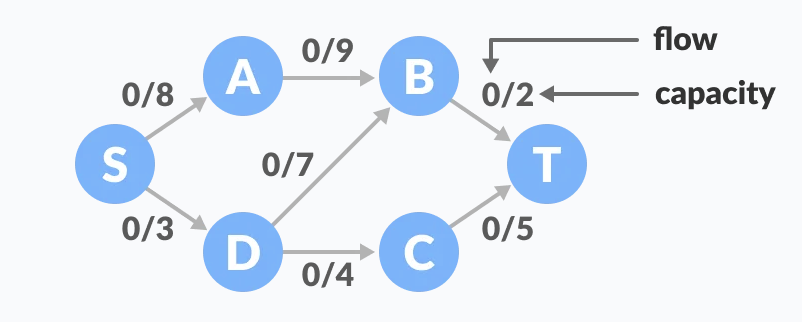

Solution:

The algorithm follows:

Initialize the flow in all the edges to 0.

While there is an augmenting path between the source and the sink, add this path to the flow.

Update the residual graph.


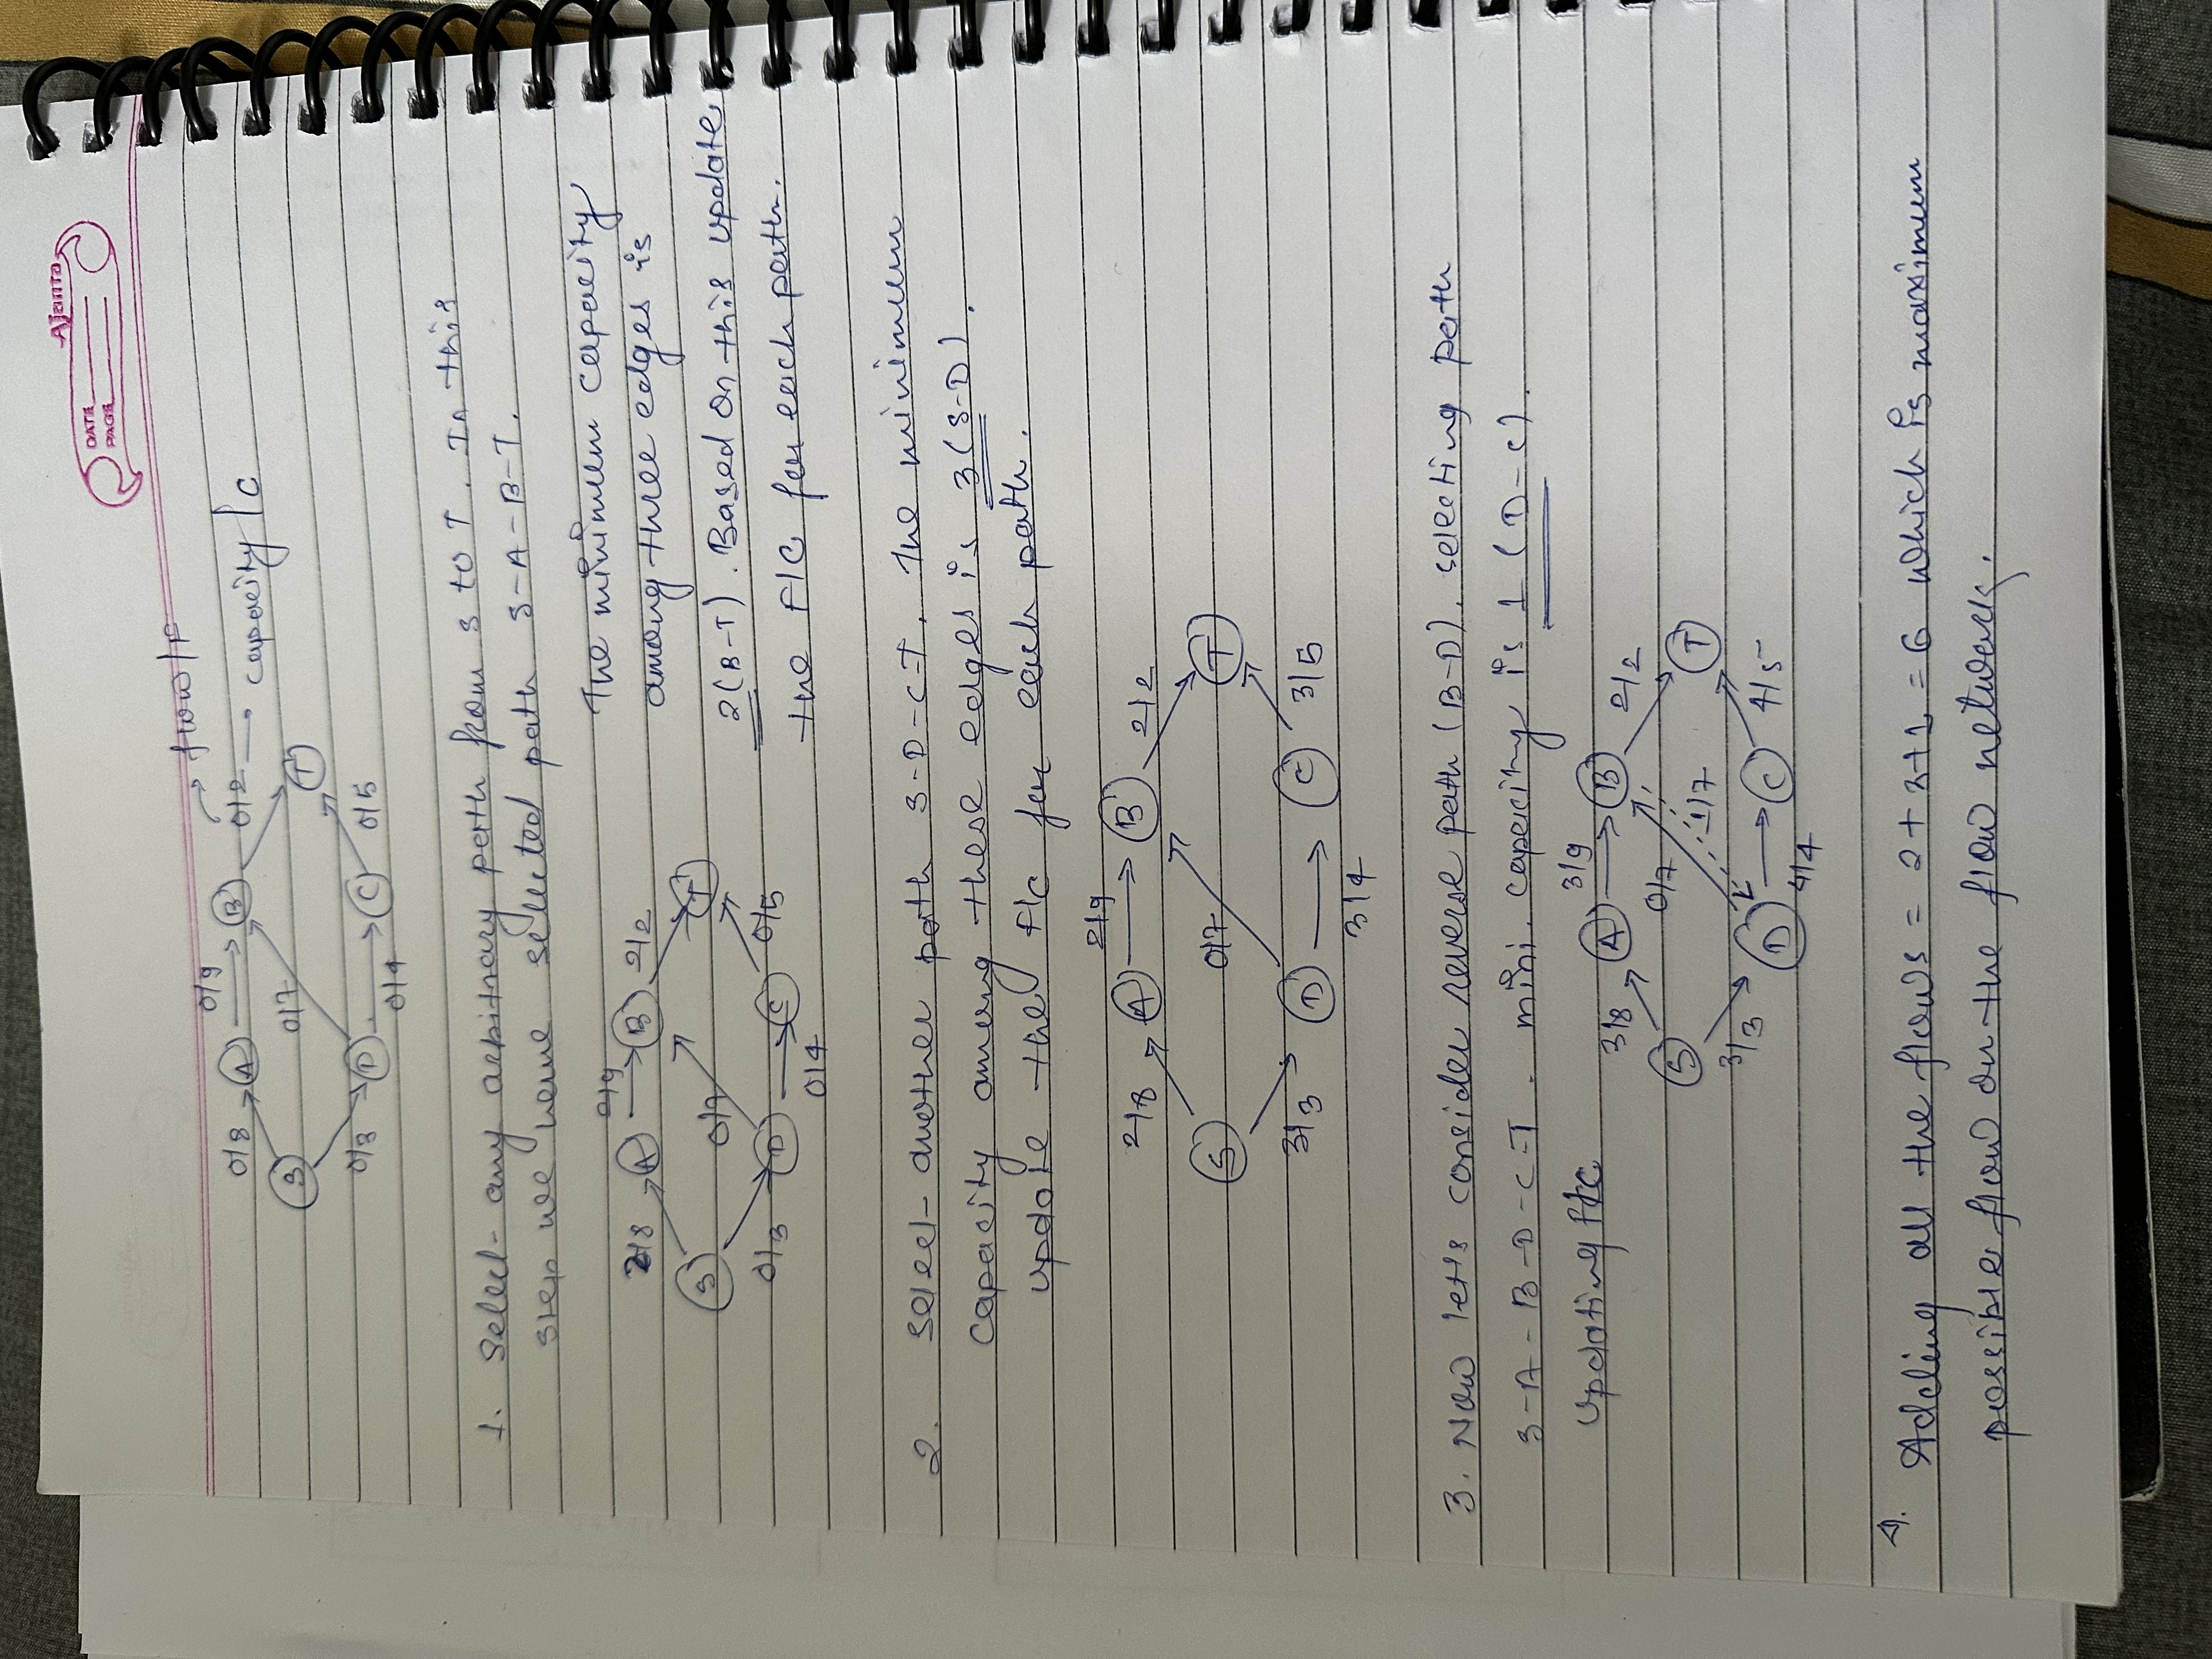


In [3]:
# Ford-Fulkerson algorith in Python

from collections import defaultdict


class Graph:

    def __init__(self, graph):
        self.graph = graph
        self. ROW = len(graph)


    # Using BFS as a searching algorithm
    def searching_algo_BFS(self, s, t, parent):

        visited = [False] * (self.ROW)
        queue = []

        queue.append(s)
        visited[s] = True

        while queue:

            u = queue.pop(0)

            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

    # Applying fordfulkerson algorithm
    def ford_fulkerson(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0

        while self.searching_algo_BFS(source, sink, parent):

            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # Adding the path flows
            max_flow += path_flow

            # Updating the residual values of edges
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow


graph = [[0, 8, 0, 0, 3, 0],
         [0, 0, 9, 0, 0, 0],
         [0, 0, 0, 0, 7, 2],
         [0, 0, 0, 0, 0, 5],
         [0, 0, 7, 4, 0, 0],
         [0, 0, 0, 0, 0, 0]]

g = Graph(graph)

source = 0
sink = 5

print("Max Flow: %d " % g.ford_fulkerson(source, sink))

Max Flow: 6 


**Q**.  Use the Preflow-Push (Push–relabel) maximum flow algorithm to find the maximum flow from node Source to
Sink in the weighted directed grap below. Show your work.

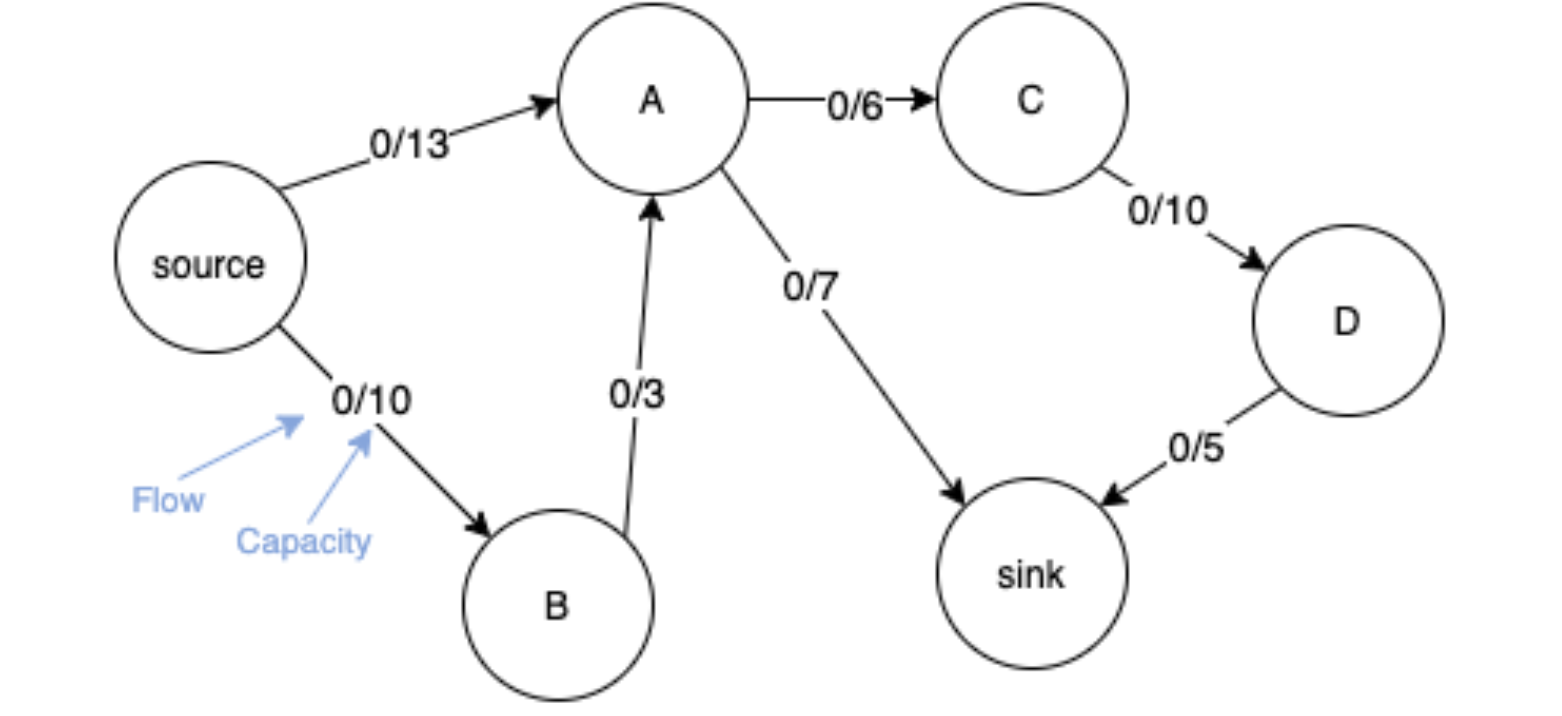


Solution:
1.Initialise the graph by setting heights and excess flow
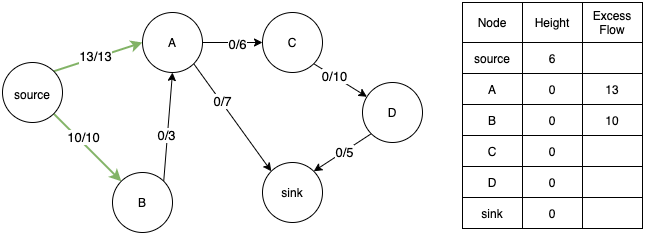

2. Consider vertex B. It cannot transfer its excess flow as its adjacent node A has the same height. So we relabel it.

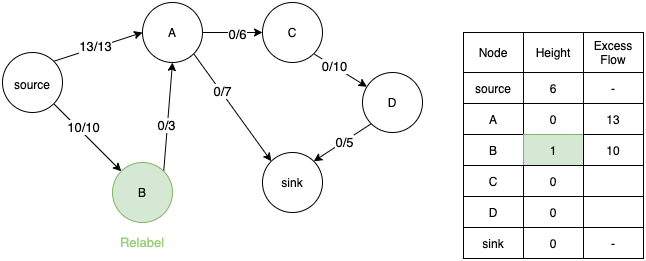

3. Now B can push its excess flow to A
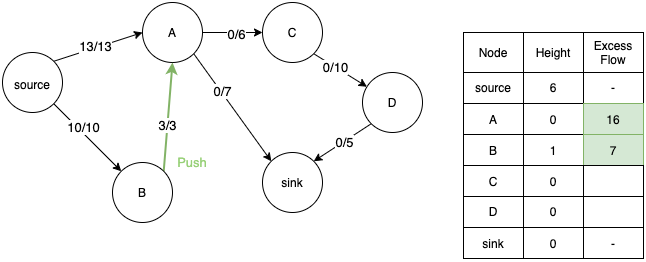

4. Similarly consider node A. We relabel its height to 1 so that it can transfer flow to its adjacent nodes C and sink.

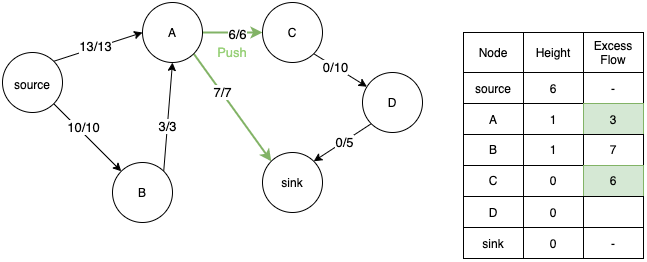

5. Now we consider node C and relabel its height, but now flow cannot travel from A to C since they are at the same height.

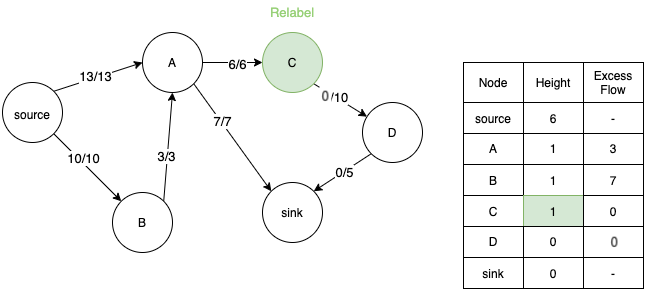

6. Hence we relabel node A.

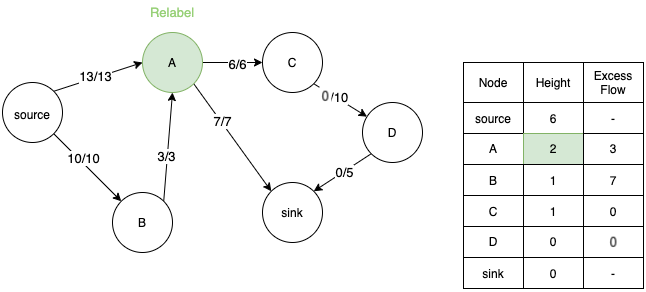

7. Since height of A is greater than height of B, it can now push back the extra flow to B.

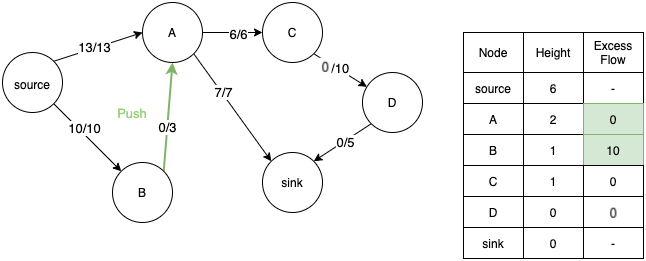

8. Since B has no other edge to transfer the flow, we relabel it again and transfer the extra flow back to A

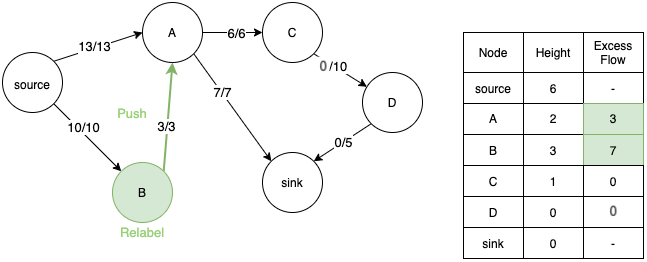

9. This to and fro operation between A and B happens till height of B is greater than source node. Now we can push back the extra flow back to source node.

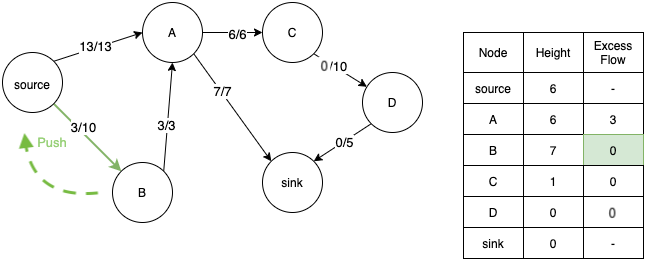

10. Similarly, when we relabel A, its height also becomes greater than source and we can push back extra flow to the source. Now both A and B nodes have 0 extra flow.

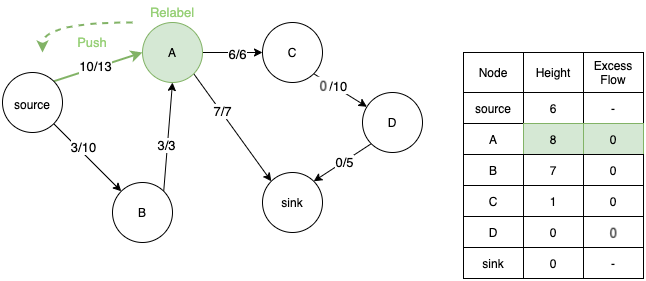

11. Now we consider node C and push its extra flow to node D.

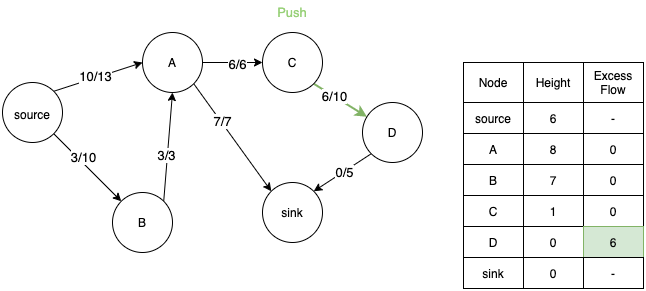

12. We relabel D and push its extra flow to sink. However we are still left with 1 unit of extra flow in D.

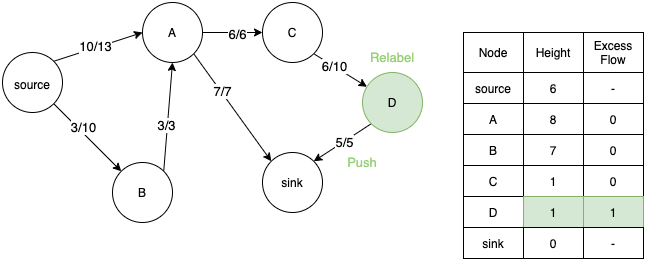

13. So, we relabel D again and push back the extra flow to C.

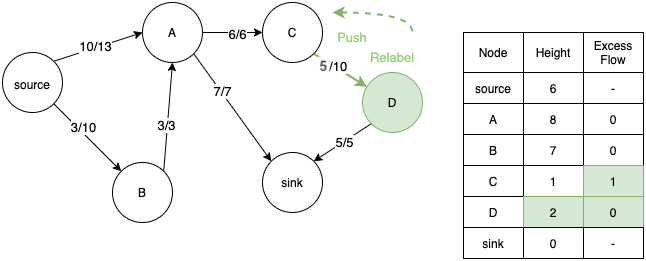

14. C again gets relabeled and the flow is pushed back to D. Flow moves to and fro between D and C till height of C becomes greater than A. Then C can push back 1 unit of extra flow to A.

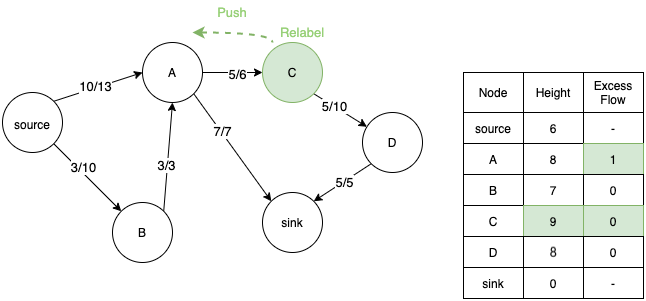

15. Since height of A is greater than source, A also pushes back the extra flow to source. Now the extra flow at all the nodes have become 0. The algorithm terminates here.

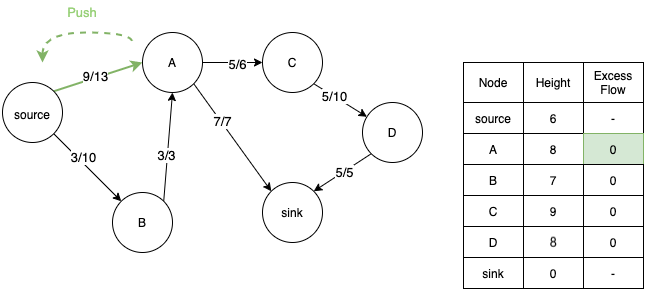

16. Maximum flow can be calculated by summing the total outgoing flow from the source or total incoming flow in the sink. In this case it is equal to 12.

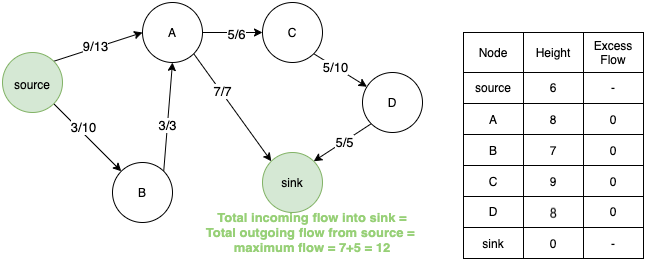



**Q.**you are given a circular array of house where the initial and final houses are neighboring, you face the challenge of maximizing your loot while adhering to the rule that no adjacent houses can be burgled. The objective is to ascertain the highest potential takings from these houses.The key is to strategize your thefts to avoid robbing houses that are next to each other, ensuring the highest cumulative profit possible within the constraints of the circular layout.

Answer based on

1.1 Define the Sub Problems

1.2 Present Your Recurrence

1.3 Prove your recurrence is correct

1.4 State and Prove Base Cases

**Solution:**

**1.1 Define the Sub Problems:**

Let's define the subproblem as follows:

Let OPT(i) represent the maximum profit achievable from robbing houses in the circular array, considering only the first i houses.

**1.2 Present Your Recurrence:**

The recurrence relation for this problem can be expressed as:

OPT(i) = max(OPT(i-1), OPT(i-2) + profit[i])

In this recurrence:

OPT(i) represents the maximum profit achievable by considering the first i houses in the circular array.
profit[i] represents the profit associated with the ith house.
The recurrence considers two possibilities:

You skip the current house i and consider the maximum profit achievable up to house i-1 (OPT(i-1)).
You rob the current house i and add its profit to the maximum profit achievable up to house i-2 (OPT(i-2)) while ensuring the non-adjacency constraint.
The objective is to maximize the total profit while avoiding robbing adjacent houses in the circular array.

**1.3 Prove the Recurrence is Correct:**

We can demonstrate the correctness of the recurrence by considering the optimal substructure property and how it encompasses all feasible ways to construct a solution:

OPT(i) based on OPT(i-1):

 If we consider the option of not robbing the current house i, we look at the maximum profit achievable up to the previous house, i-1 (OPT(i-1)). This represents a scenario where we exclude the current house from our selection, ensuring non-adjacency.

OPT(i) based on OPT(i-2) + profit[i]:

If we consider the option of robbing the current house i, we add the profit of the current house to the maximum profit achievable up to house i-2 (OPT(i-2)). This represents a scenario where we include the current house in our selection, ensuring non-adjacency by skipping the house at i-1.

By considering these two options, the recurrence covers all possible ways to maximize profit while adhering to the non-adjacency constraint. The recurrence is consistent with the principle of optimal substructure, as we make decisions based on smaller subproblems (OPT(i-1) and OPT(i-2)) to build the solution for the current problem (OPT(i)).


**1.4 State and Prove Base Cases:**

Base Case 1: OPT(0) = 0: The maximum profit achievable with no houses in the circular array is zero.

Base Case 2: OPT(1) = profit[1]: The maximum profit achievable with only the first house is the profit associated with that house.

The base cases provide the starting point for the dynamic programming process and are evident in their correctness, as they handle the simplest instances of the problem.


**Q**. In a densely populated city, a sudden outbreak of a contagious disease has occurred, and emergency response teams need to distribute limited medical supplies to various distribution centers. There are n neighborhoods in the city, each with its own specific needs for medical supplies.

There are k distribution centers available to store and distribute the medical supplies. Each neighborhood needs to receive medical supplies from a distribution center within a half-hour's travel time to ensure timely assistance.

However, there's a need to balance the load on distribution centers to avoid overloading any single center. To maintain this balance, the teams need to collectively decide whether it's possible to assign each neighborhood to a distribution center in a way that ensures each center receives at most [n/k] neighborhoods.

Design a polynomial-time algorithm that can take the given information about the neighborhoods, their needs, and the distribution centers to determine if it's possible to create an equitable distribution plan that meets the specified load-balancing criteria.

Solution:

Make a flow network in which:

Each neighborhood is modeled as a source node with a capacity equal to its medical supply requirements.
Each distribution center is depicted as a sink node with a capacity of [n/k], which is the maximum number of neighborhoods it can serve.
Add edges with capacities equal to the maximum permissible transit time (e.g., half an hour) between the neighborhood and the distribution center from the source nodes (neighborhoods) to the sink nodes (distribution centers). This ensures that neighborhoods can only be assigned to distribution centers if they are within the trip time limit.

To find the maximum flow in the network, use the Ford-Fulkerson algorithm or any other max-flow approach. The max-flow shows the maximum amount of medical supplies that can be distributed from neighborhoods to distribution centers while adhering to trip time limits.

If the max-flow is equal to the sum of all neighborhoods' medical supply demands (i.e., all neighborhoods are served) and each distribution center obtains a flow equal to [n/k] (i.e., load balancing is achieved), then an equitable distribution plan can be created. Otherwise, it is not possible.

If the max-flow criterion is met, the distribution plan can be extracted by studying the flow values along the edges. Each neighborhood's flow to a distribution center determines which distribution center should service that community.

This algorithm runs in polynomial time, with the complexity defined primarily by the max-flow algorithm used. If the maximum flow is achieved, it will offer a balanced distribution plan that meets the load-balancing conditions stated. Otherwise, it will state that such a distribution strategy is not feasible.

Let's consider an example to illustrate the algorithm for distributing medical supplies to neighborhoods while balancing the load on distribution centers.

Scenario:

There are 8 neighborhoods (n = 8) in a city, each with specific medical supply needs.

There are 2 distribution centers (k = 2) available for distributing medical supplies.

The maximum allowed travel time is 30 minutes for each neighborhood to reach a distribution center.

Neighborhoods and Their Medical Supply Needs:

Neighborhood A: 20 units

Neighborhood B: 25 units

Neighborhood C: 15 units

Neighborhood D: 10 units

Neighborhood E: 30 units

Neighborhood F: 18 units

Neighborhood G: 22 units

Neighborhood H: 28 units

To check if it's possible to create a balanced distribution plan, we'll apply the algorithm:

Create a flow network with source nodes for neighborhoods, sink nodes for distribution centers, and edges with capacities equal to the travel time.

Set the capacities of the sink nodes (distribution centers) to [n/k] = [8/2] = 4.

Connect the source nodes to the sink nodes with edges representing travel time:

Neighborhood A to Distribution Center 1 with a capacity of 30

Neighborhood B to Distribution Center 1 with a capacity of 30

Neighborhood C to Distribution Center 2 with a capacity of 30

Neighborhood D to Distribution Center 2 with a capacity of 30

Neighborhood E to Distribution Center 1 with a capacity of 30

Neighborhood F to Distribution Center 1 with a capacity of 30

Neighborhood G to Distribution Center 2 with a capacity of 30

Neighborhood H to Distribution Center 2 with a capacity of 30

Apply a max-flow algorithm to find the maximum flow in the network. The goal is to determine if all neighborhoods can receive their needed medical supplies and if the distribution centers' load is balanced.

After running the max-flow algorithm, let's say we find that the maximum flow is 120, which is equal to the total supply needs of all neighborhoods. Additionally, each distribution center receives a flow of 60, which is equal to [n/k] = 4 neighborhoods.

This means that it's possible to create a balanced distribution plan where each distribution center serves 4 neighborhoods, and all neighborhoods receive their required medical supplies within the specified travel time.






**Q** Given the weights and values of the five items in the table below, select a subset of items with the maximum combined value that will fit in a knapsack with a weight limit, W, of 5. Use dynamic programming. Show your work.

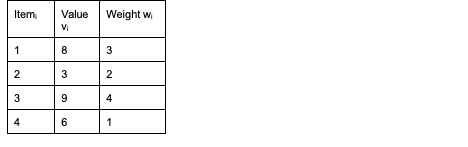

Capacity of Knapsack = 5

Given-

•	Knapsack capacity (w) = 5 kg

•	Number of items (n) = 4

Step-01:

•	Draw a table say ‘T’ with (n+1) = 4 + 1 = 5 number of rows and (w+1) = 5 + 1 = 6 number of columns.

•	Fill all the boxes of 0th row and 0th column with 0.

Step-02:

•	Start filling the table row wise top to bottom from left to right using the formula-

•	T (i , j) = max { T ( i-1 , j ) , valuei + T( i-1 , j – weighti ) }

Finding T(1,1)-

We have,

i = 1,j = 1

(value)i = (value)1 = 8

(weight)i = (weight)1 = 3

Substituting the values, we get-

T(1,1) = max { T(1-1 , 1) , 8 + T(1-1 , 1-3) }

T(1,1) = max { T(0,1) , 8 + T(0,-2) }

T(1,1) = T(0,1) { Ignore T(0,-4) }

T(1,1) = 0

Similarly , finding other values …


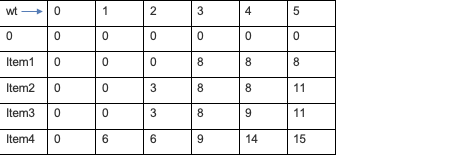

•	The last entry represents the maximum possible value that can be put into the knapsack.

•	So, maximum possible value that can be put into the knapsack = 15.

The subset of items that will fit in a knapsack with a weight limit of 5 from these 4 items is the subset (3, 4), with a total value of 15.

           S= {3, 4}






In [1]:
def knapsack(values, weights, W):
    n = len(values)

    # Create a table to store the maximum value for each (item, weight) combination
    dp = [[0 for _ in range(W + 1)] for _ in range(n + 1)]

    # Fill the table using dynamic programming
    for i in range(1, n + 1):
        for w in range(1, W + 1):
            # If the current item's weight exceeds the current capacity, skip it
            if weights[i - 1] > w:
                dp[i][w] = dp[i - 1][w]
            else:
                # Take the maximum of two cases:
                # 1. Including the current item
                # 2. Excluding the current item
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])

    # Backtrack to find the items included in the knapsack
    selected_items = []
    i, w = n, W
    while i > 0 and w > 0:
        if dp[i][w] != dp[i - 1][w]:
            selected_items.append(i)
            w -= weights[i - 1]
        i -= 1

    return dp[n][W], selected_items[::-1]

# Values and weights of the items
values = [8, 3, 9, 6]
weights = [3, 2, 4, 1]

# Knapsack weight limit
W = 5

# Solve the knapsack problem and get the maximum value and selected items
max_value, selected_items = knapsack(values, weights, W)

print("Maximum Value:", max_value)
print("Selected Items:", selected_items)

Maximum Value: 15
Selected Items: [3, 4]


**Q**  Given the five intervals below, and their associated values; select a subset of non-overlapping intervals with the maximum combined value. Use dynamic programming. Show your work.

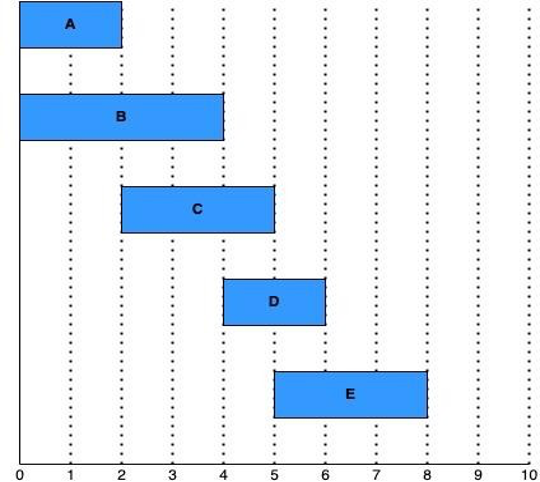

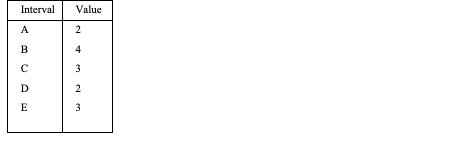

To solve this problem using dynamic programming, we need to find the maximum combined value of a subset of non-overlapping intervals.

The algorithm works as follows:

Create an array abc of size n + 1, where n is the number of intervals.

Initialize the first element of the abc array with a value of 0.

For each interval i from 0 to n-1:
a. Calculate the maximum value of the interval i by considering the interval j that ends before i and taking the maximum value between abc[j] + value[i] and abc[i - 1].

The maximum value of the combined intervals is stored in the last element of the abc array, abc[n].

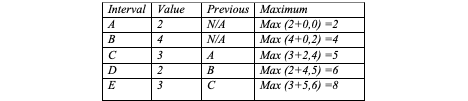

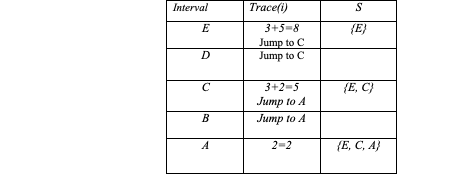


S = {A, C, E} with a combined weight of 8.



**Q** For each of the following recurrences, give an expression for the runtime T(n) if the recurrence can be solved with the Master Theorem. Otherwise, indicate that the Master Theorem does not apply.

i)	T(n) = 16T (n/4) + n

ii) T(n) = 64T (n/8) - n^2 logn

iii)	T(n) = 3T(n/3) + √n

iv) T(n) = √2T(n/2) + logn

v)	T(n) = 3T(n/4) + nlogn

Solution:

Master Theorem-

Master’s Theorem is a popular method for solving the recurrence relations.


Master’s theorem solves recurrence relations of the form-



  
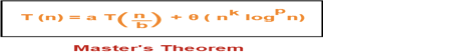


Here, a >= 1, b > 1, k >= 0 and p is a real number.

Master Theorem Cases:

To solve recurrence relations using Master’s theorem, we compare a with bk.

Then, we follow the following cases-

Case-01:

If a > bk, then T(n) = θ (nlogba)



Case-02:

If a = bk and



If p < -1, then T(n) = θ (nlogba)

If p = -1, then T(n) = θ (nlogba.log2n)

If p > -1, then T(n) = θ (nlogba.logp+1n)



Case-03:

If a < bk and



If p < 0, then T(n) = O (nk)

If p >= 0, then T(n) = θ (nklogpn)





Form a recurrence relation for the following code and solve it using Master’s theorem-



A(n)

{

if(n<=1)

return 1;

else

return A(√n);

}


i)	T(n) = 16T (n/4) + n

                                         We compare the given recurrence relation with T(n)=aT(n/b) + θ(n^k 〖log〗_^p n)

                                         a= 16, b=4 , k=1 and p=0

                                         now a=16 and b^k= 4

                                         clearly,  a>b^k So, we follow case 01 :

                                         so we have :  T(n)=  θ (nlogba)

                                                           =θ (nlog416)

                                                           = θ (n^2)



ii) T (n) = 64T (n/8) – n2 log n

Master Theorem does not apply as (f(n) is not positive)



iii)	T(n) = 3T (n/3) + √ n

                                         We compare the given recurrence
                                         relation with T(n)=aT(n/b) + θ(n^k 〖log〗_^p n)

                                         a= 3, b=3 , k=1/2 and p=0

                                         now a=3 and b^k= 3^(1/2)=1.7

                                         clearly,  a>b^k So, we follow case 01 :

                                         so we have :  T(n)=  θ (nlogba)

                                                           =θ (nlog33)

                                                           = θ (n)





iv)	T(n) = √ 2T (n/2) + log n

                                         We compare the given recurrence relation with T(n)=aT(n/b) + θ(n^k 〖log〗_^p n)

                                         a= √ 2=1.44, b=2 , k=0 and p=1

                                         now a=1.4 and b^k= 1

                                         clearly,  a>b^k So, we follow case 01 :

                                         so we have :  T(n)=  θ (nlogba)

                                                           =θ (nlog2√ 2)

                                                           = θ (√ n)


v) T(n) = 3T (n/4) + n log n

We compare the given recurrence relation with T(n)=aT(n/b) + θ(n^k 〖log〗_^p n)

                                         a= 3, b=4, k=1 and p=1

                                         now a=3 and b^k=4

                                         clearly,  a<b^k So, we follow case 01 :

                                         so we have :  T(n)=  θ (n^k 〖log〗_^p n)
                                         
                                   =θ (n logn)






**Reflection on problems**


**Shortest Path Using Bellman-Ford Algorithm**: Exploring the Bellman-Ford algorithm to find the shortest path is a practical application of graph theory. It highlights the importance of pathfinding in real-world scenarios, from GPS navigation systems to data routing in networks. Understanding this algorithm and its termination conditions is essential for network optimization and avoiding negative-weight cycles.

**Maximum Flow with Ford-Fulkerson Algorithm:** The Ford-Fulkerson algorithm provides valuable insights into solving maximum flow problems in networks. It showcases the iterative augmentation process and the need for careful handling of flow capacities. Additionally, understanding the concept of residual capacities and the algorithm's termination criteria is crucial. This knowledge is applicable in various fields, including transportation and communication networks.

**Preflow-Push Algorithm for Maximum Flow:** The Preflow-Push (Push-Relabel) algorithm is a more efficient approach to maximum flow problems. It emphasizes the importance of maintaining preflows and optimizing flow paths. This exercise allows you to delve deeper into the inner workings of advanced flow algorithms. It's a practical illustration of how preflows and relabeling contribute to network optimization.

**Reducing Flow Network Capacity**: The problem of minimizing flow by deleting edges from a network involves intricate trade-offs. Crafting a polynomial-time algorithm for this task is intellectually challenging. It highlights the complexities of network resilience and resource management, making you consider the balance between flow reduction and network functionality.

**Balancing Load in Emergency Response:** The scenario of efficiently distributing injured individuals to hospitals while ensuring load balance is both humanitarian and logistical. Developing a polynomial-time algorithm for this is a problem with real-world implications. It merges assignment and optimization principles, showcasing how algorithms can aid in emergency response and resource allocation.

**Bank ATM Expansion Problem:** The bank ATM expansion problem under adjacency constraints exemplifies a real-world business challenge. It involves selecting optimal locations to maximize profit. The problem can be likened to the classic "maximum independent set" problem and underscores the role of algorithms in making strategic business decisions.

**Master Theorem and Recurrence Relations:** Understanding the Master Theorem is foundational in algorithm analysis. Analyzing recurrence relations is crucial for determining the efficiency of recursive algorithms. Some of the provided recurrences are straightforward, while others require deeper analysis. This knowledge forms the basis of algorithmic complexity analysis.

**Solving Knapsack Problem with Dynamic Programming:** Solving the knapsack problem using dynamic programming illustrates the power of this technique in solving complex resource allocation problems. Building and populating a dynamic programming table step by step is essential for comprehending and applying dynamic programming in various optimization scenarios.